<a href="https://colab.research.google.com/github/sftSalman/-Image-compression-using-K_mean_clusturing/blob/main/Pneumonia_classification_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# In this notebook , we will classify the pneumonia from data set comes from kaggle

##Project line up(proceedure)
#1 Getting data 
#2 Preprocess data 
#3 Visuliazation data 
#4 Data set create 
#5 Dataloader 
#7 Model 
#8 Training 
#9 Model evaluation 
#10 Test and save 

In [2]:
# import all required package 

import torch.nn as nn 
import numpy as np
import pandas as pd 
import seaborn  as sns 
import matplotlib.pyplot as plt


##Getting the dataset

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salmanfarshi","key":"8baa14213cdb4087d7c16c299e425b0d"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:

! cp kaggle.json ~/.kaggle/
! kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           3371        128  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51            801         30  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensive football transfers        2KB  2023-03-27 04:06:28            545         23  1.0              
davidms8/product-sales-detail                                 Product Sales - Detail 

In [16]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia-set -p /content/

403 - Forbidden


In [14]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia-set -p /content/


403 - Forbidden


In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:40<00:00, 63.3MB/s]
100% 2.29G/2.29G [00:40<00:00, 60.5MB/s]


In [9]:
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

## lets observe the dataset

In [10]:
from pathlib import  Path


In [11]:
image_dir = '/content/chest_xray'

In [12]:
image_path = image_dir

In [13]:
import os 

def observe_data(dir):
  for path,dir , name in os.walk(dir):
    print(path,dir,len(name))

In [14]:
observe_data(image_path)

/content/chest_xray ['train', 'chest_xray', '__MACOSX', 'test', 'val'] 0
/content/chest_xray/train ['PNEUMONIA', 'NORMAL'] 0
/content/chest_xray/train/PNEUMONIA [] 3875
/content/chest_xray/train/NORMAL [] 1341
/content/chest_xray/chest_xray ['train', 'test', 'val'] 1
/content/chest_xray/chest_xray/train ['PNEUMONIA', 'NORMAL'] 1
/content/chest_xray/chest_xray/train/PNEUMONIA [] 3876
/content/chest_xray/chest_xray/train/NORMAL [] 1342
/content/chest_xray/chest_xray/test ['PNEUMONIA', 'NORMAL'] 1
/content/chest_xray/chest_xray/test/PNEUMONIA [] 390
/content/chest_xray/chest_xray/test/NORMAL [] 234
/content/chest_xray/chest_xray/val ['PNEUMONIA', 'NORMAL'] 1
/content/chest_xray/chest_xray/val/PNEUMONIA [] 9
/content/chest_xray/chest_xray/val/NORMAL [] 9
/content/chest_xray/__MACOSX ['chest_xray'] 1
/content/chest_xray/__MACOSX/chest_xray ['train', 'test', 'val'] 3
/content/chest_xray/__MACOSX/chest_xray/train ['PNEUMONIA', 'NORMAL'] 3
/content/chest_xray/__MACOSX/chest_xray/train/PNEUMONI

In [15]:
%cd /content/chest_xray


/content/chest_xray


In [16]:
!rm -r __MACOSX

In [17]:
!rm -r chest_xray

In [18]:
observe_data(image_path)

/content/chest_xray ['train', 'test', 'val'] 0
/content/chest_xray/train ['PNEUMONIA', 'NORMAL'] 0
/content/chest_xray/train/PNEUMONIA [] 3875
/content/chest_xray/train/NORMAL [] 1341
/content/chest_xray/test ['PNEUMONIA', 'NORMAL'] 0
/content/chest_xray/test/PNEUMONIA [] 390
/content/chest_xray/test/NORMAL [] 234
/content/chest_xray/val ['PNEUMONIA', 'NORMAL'] 0
/content/chest_xray/val/PNEUMONIA [] 8
/content/chest_xray/val/NORMAL [] 8


In [19]:
train_data ='/content/chest_xray/train'
test_data = '/content/chest_xray/test'

In [20]:
len(train_data)

25

In [21]:
len(test_data)

24

In [22]:
from PIL import Image

In [23]:
from pathlib import Path

image_path = Path(image_path)  # replace with the path to your images directory
image_path_list = list(image_path.glob('*/*/*.jpeg'))




In [24]:
len(image_path_list)


5856

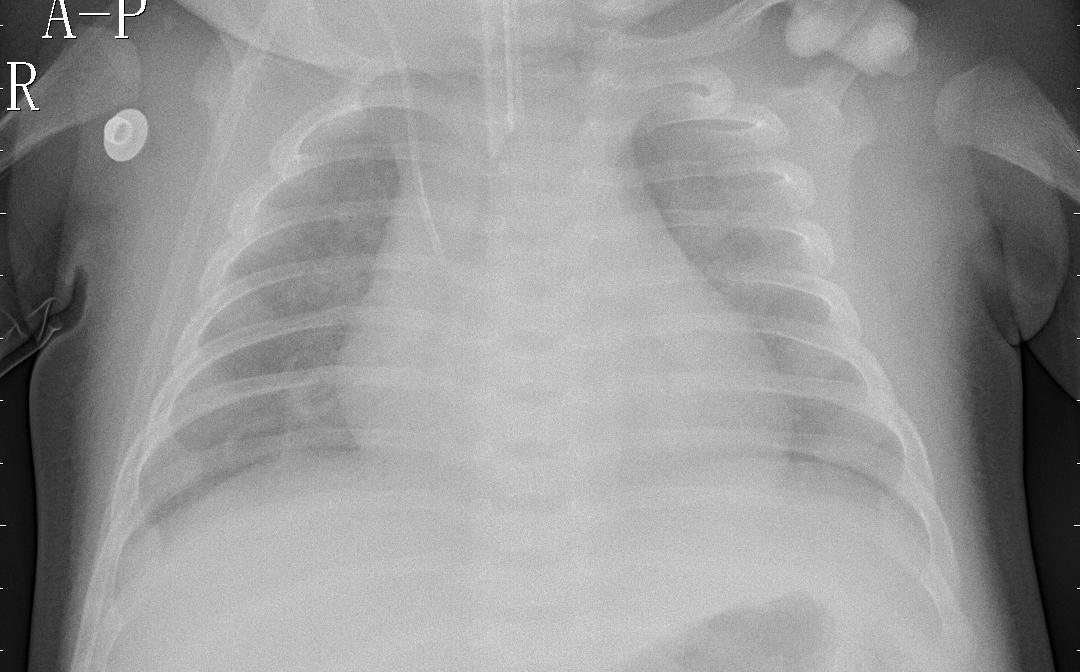

In [25]:
import random
random_image_path_list= random.choice(image_path_list)
Image.open(random_image_path_list)

In [26]:
img=Image.open(random_image_path_list)



In [27]:
class_name = random_image_path_list.parent.stem
print(class_name)

PNEUMONIA


In [28]:
# Visuliazation using matplotlib 

In [29]:
img_array = np.asarray(img)

In [30]:
print(img_array)

[[39 44 50 ... 28 27 26]
 [37 42 48 ... 29 28 26]
 [35 40 45 ... 30 29 27]
 ...
 [22 22 22 ... 17 16 16]
 [22 22 22 ... 18 17 17]
 [22 22 22 ... 18 18 17]]


In [35]:
img_array.shape

(672, 1080)

# Transfromation of data 

In [41]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 

In [44]:
custom_transfrom = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])
                                  

In [45]:
# Loading data using ImageFolder 

from torchvision import datasets

In [47]:
train_data = datasets.ImageFolder(root=train_data,
                                  transform=custom_transfrom,
                                  target_transform = None)

In [48]:
len(train_data)

5216

In [54]:
print(train_data)

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: /content/chest_xray/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
